In [1]:
import numpy as np
import tifffile

In [2]:
img_path = 'fixed_middle.tif'
img = tifffile.imread(img_path)
img.shape

(7271, 5530)

In [3]:
import mba

In [4]:
cmin = np.zeros(2)
cmax = np.array(img.shape)

In [84]:
# use random points for the correspondences
nb_matches = 20
max_disp = 10  # pixels

fixed_pts = np.floor(np.random.uniform(0, 1, (nb_matches, 2))*cmax).astype('int')
displacements = np.arange(nb_matches*2).reshape((2, nb_matches)).T

In [85]:
grid = [3, 3]
interp = mba.mba2(cmin, cmax, grid, fixed_pts, displacements[:, 0])
print(interp)

level 1: initial approximation
level 2: dense  [35, 35] (9800 bytes)
level 3: sparse [67, 67] (7440 bytes, compression: 0.21)
level 4: sparse [131, 131] (7632 bytes, compression: 0.06)
level 5: sparse [259, 259] (7680 bytes, compression: 0.01)



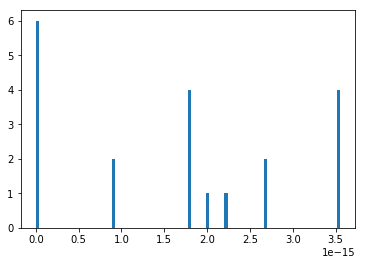

In [86]:
import matplotlib.pyplot as plt
error = abs(displacements[:, 0]-interp(fixed_pts))
plt.hist(error.ravel(), bins=100)
plt.show()

In [87]:
grid = [5, 5]
interp_y = mba.mba2(cmin, cmax, grid, fixed_pts, displacements[:, 0])
interp_x = mba.mba2(cmin, cmax, grid, fixed_pts, displacements[:, 1])

In [88]:
n = 100
sy = np.linspace(0,img.shape[0],n)
sx = np.linspace(0,img.shape[1],n)
x = np.array(np.meshgrid(sy,sx)).transpose([1,2,0]).copy()

In [89]:
def plot_surface(interp):  # m0 is the initial grid size (nb control points to start with)
#     error = np.amax(np.abs(val - interp(coo))) / np.amax(np.abs(val))
    v = interp(x)
    plt.pcolormesh(sy, sx, v, cmap='RdBu')
#     plt.scatter(x=coo[:,0], y=coo[:,1], c=val, cmap='RdBu')
#     plt.xlim([0,1])
#     plt.ylim([0,1])
#     plt.title("$m_0 = {0:}$, error = {1:.3e}".format(m0, error))
    plt.colorbar();

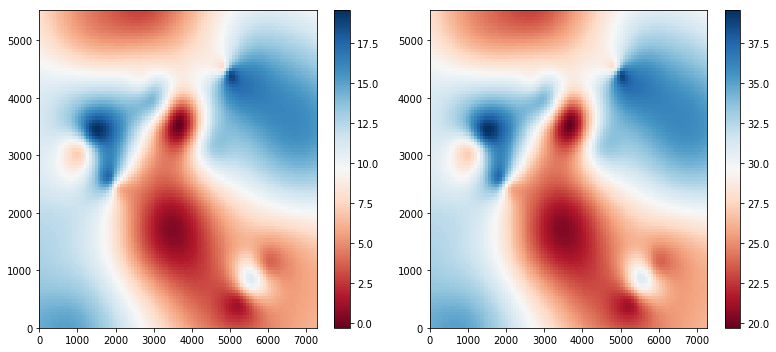

In [90]:
plt.figure(figsize=(11,5))
plt.subplot(121); plot_surface(interp_y)
plt.subplot(122); plot_surface(interp_x)
plt.tight_layout()